## Spacetime Cube and Animation

a.	Downloads the annual 30-Year Normals .bil files for precipitation from PRISM [2]

[2] PRISM website: https://prism.oregonstate.edu/normals/

In [7]:
import requests
from ftplib import FTP
from zipfile import ZipFile
def FTPNormalsDownload(server_filename):
    
    ftp = FTP('prism.nacse.org')
    #enter credentials
    ftp.login(user = 'anonymous', passwd= 'and04671@umn.edu')
    #navigate directories
    ftp.cwd('normals_4km/ppt')
    #establish local_filename as inside the PRISM ZIP folder
    local_filename = open(server_filename, 'wb')
    ftp.retrbinary('RETR '+ server_filename, local_filename.write)
    #close the server and local_filename
    ftp.close()
    local_filename.close()
    
for each in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        # the server file
        desired_file = "PRISM_ppt_30yr_normal_4kmM2_"+each+"_bil.zip" 
        FTPNormalsDownload(desired_file)
        with ZipFile(desired_file) as myzip: 
            myzip.extractall(path = 'PRISM_ZIPS')


In [15]:
import arcpy
spatial_ref = arcpy.Describe("PRISM_ZIPS/PRISM_ppt_30yr_normal_4kmM2_01_bil.bil").spatialReference
spatial_ref
arcpy.CreateMosaicDataset_management('Lab2.gdb', 'TestMosaic', spatial_ref)

<Result 'C:\\Users\\Cole\\Documents\\GitHub\\GIS5572\\Lab2\\Lab2.gdb\\TestMosaic'>

In [16]:
#attempt at convert bil to tiff first
arcpy.RasterToOtherFormat_conversion(r"PRISM_ZIPS/PRISM_ppt_30yr_normal_4kmM2_01_bil.bil",r"Lab2.gdb","CRF")

<Result ''>

In [18]:
#attempt at direct BIL to mosaic
for each in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    desired_file = "PRISM_ZIPS/PRISM_ppt_30yr_normal_4kmM2_"+each+"_bil.bil"
    arcpy.AddRastersToMosaicDataset_management('Lab2.gdb/TestMosaic','Raster Dataset', desired_file, )

In [27]:
arcpy.env.workspace = 'Lab2.gdb'
InputTable = "TestMosaic/Footprint"
FieldName= 'Variable'
FieldType= 'Text'
ExpressionType = 'Python3'
Variable = 'Precipitation'

arcpy.CalculateField_management(InputTable, FieldName, Variable, expression_type = ExpressionType, field_type = FieldType)

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000732: Input Table: Dataset TestMosaic/Footprint does not exist or is not supported
Failed to execute (CalculateField).


# after is unzipped (we see to have an issue there)
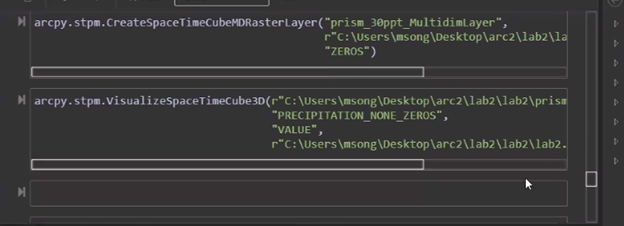
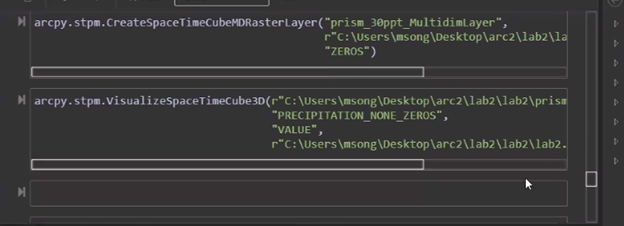
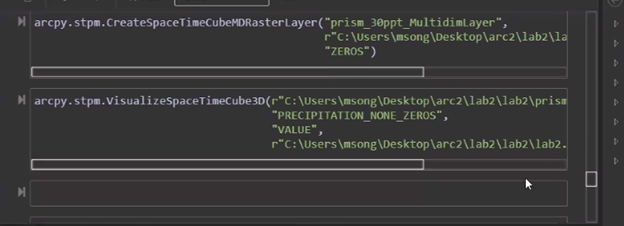
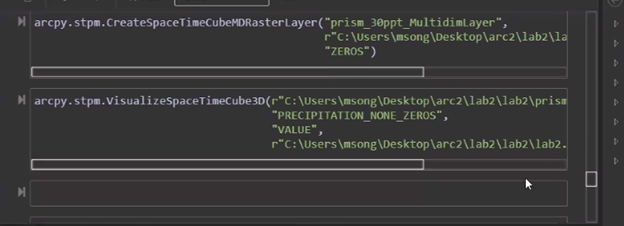
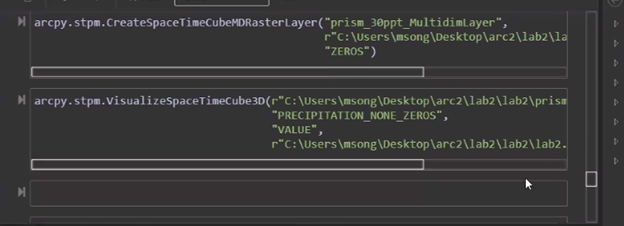

None


<Result 'C:\\Users\\Cole\\Documents\\GitHub\\GIS5572\\Lab2\\Lab2.gdb\\Lab2Mosaic'>

b.	Converts the data into a spacetime cube and exports it to disk (see here for example of final conversion step; to get to this point, you will need to go through other transform steps likely) [3]

[3] This blog post will give you some inspiration as to why we are emphasizing spacetime cubes: https://www.esri.com/arcgis-blog/products/arcgis-pro/analytics/explore-your-raster-data-with-space-time-pattern-mining/ 

In [33]:
import arcpy
import os

#get it to a TIF
#arcpy.env.workspace = 'C:/PRISM_ppt_30yr_normal_4kmM2_all_bil'
arcpy.RasterToOtherFormat_conversion('BIL0.bil','Lab2.gdb', 'CRF')
#now create mosaic dataset
#add rasters to Mosaic Dataset
#arcpy.AddRastersToMosaicDataset_management('Lab2.gdb/Lab2Mosaic', 'Raster Dataset', 'BIL0')
#arcpy.AddRastersToMosaicDataset_management('Lab2.gdb/Lab2Mosaic', 'Raster Dataset', 'BIL1')


<Result ''>

In [36]:
arcpy.env.workspace = 'Lab2.gdb'
#Create and populate variable field in Mosaic
mosaic = 'Lab2Mosaic/Footprint'
field_name = 'precipitation'
arcpy.CalculateField_management(mosaic, field_name, 'pm' )
#Create and populate a timestamp field in mosiaic


#time enable mosaic using Build MultiDimensional Info
#". Since time in ArcGIS Pro can act as a filter, 
#turn off time on the mosaic by right-clicking the mosaic, 
#then changing Layer Time to No Time in the Time tab. 
#This step is best practice to avoid unexpected time ranges in your results."
#convert time mosaic to single time layer via Make Multidimentsional Raster Tool
#create cube using Create Time Cube from Multidimensional Raster Layer

ExecuteError: ERROR 000539: Traceback (most recent call last):
  File "<expression>", line 1, in <module>
NameError: name 'pm' is not defined

Failed to execute (CalculateField).


c.	Exports an animation of the timeseries

In [20]:
dir('CURRENT')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']